In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовые

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler # нормализация и масштабирование данных

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

from sklearn.model_selection import cross_val_score # кроссвалидация
from sklearn.model_selection import GridSearchCV # подбор гиперпараметров с кроссвалидацией


from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

import gc

sns.set()
%matplotlib inline

import sys
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=sys.maxsize)
# np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 20 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

/var/folders/mw/bkx9xzrs45g7jqfptt8zy8740000gn/T/ipykernel_1012/1019878072.py:50: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Полезные ссылки
* [1.11. Ensembles: Gradient boosting, random forests, bagging, voting, stacking]()
* [1.11. Ансамблевые методы](https://scikit-learn.ru/1-11-ensemble-methods/)
* [Методы сбора ансамблей алгоритмов машинного обучения: стекинг, бэггинг, бустинг](https://habr.com/ru/articles/561732/)
* [Ансамблевые методы машинного обучения](https://habr.com/ru/articles/571296/)
* [XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/index.html)
* [Catboost Documentation]()
* [Открытый курс машинного обучения. Тема 10. Градиентный бустинг](https://habr.com/ru/companies/ods/articles/327250/)
* [Виды ансамблей](https://neerc.ifmo.ru/wiki/index.php?title=%D0%92%D0%B8%D0%B4%D1%8B_%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B9)
* [Бустинг, AdaBoost - ИТМО](https://neerc.ifmo.ru/wiki/index.php?title=%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3,_AdaBoost)
* [XGBoost - ИТМО](https://neerc.ifmo.ru/wiki/index.php?title=XGBoost)
* [CatBoost - ИТМО](https://neerc.ifmo.ru/wiki/index.php?title=CatBoost&mobileaction=toggle_view_desktop)
* [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
* [2.3. Решающие деревья - яндекс хэндбук](https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya)
* [2.4. Ансамбли в машинном обучении - яндекс хэндбук](https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii)
* [2.5. Градиентный бустинг - яндекс хэндбук](https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting)
* [Презентация MatrixNet: есть про бустинг](https://cachev2-m9-11.cdn.yandex.net/download.yandex.ru/company/experience/searchconf/Searchconf_Algoritm_MatrixNet_Gulin.pdf?lid=226)
* [The Strength of Weak Learnability](http://rob.schapire.net/papers/strengthofweak.pdf)
* [Ensemble methods: bagging, boosting and stacking](https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205)
* [CatBoost, XGBoost и выразительная способность решающих деревьев](https://habr.com/ru/companies/ods/articles/645887/)
* [XGBoost, LightGBM или CatBoost - какой алгоритм бустинга следует использовать?](https://vk.com/@coeusds-xgboost-lightgbm-ili-catboost-kakoi-algoritm-bustinga-sled)
* [1.13. Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection)
* [1.13. Выбор признаков](https://scikit-learn.ru/1-13-feature-selection/)
* [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

# Загрузка и предобработка данных

In [4]:
dataset = pd.read_csv('/Users/amirmukhamedzhan/Yandex.Disk.localized/Документы/KFU/ML/ML_FALL_2023/data/Data.csv')
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
dataset.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [8]:
d = {2: 0, 4: 1}
dataset["Class"] = dataset["Class"].map(d)
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [9]:
dataset.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [10]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [11]:
X.shape, y.shape

((683, 10), (683,))

In [12]:
# разбиение  на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Что такое ансамбль?

Метод машинного обучения, где несколько моделей (**слабые ученики**) обучаются для решения одной и той же проблемы и объединяются для получения лучших результатов называется ансамблевым методом. Основная предпосылка заключается в том, что результат работы нескольких моделей будет более точен, чем результат только одной модели.

Объединение слабых учеников для улучшения качества модели, уменьшения смещения или разброса, называется сильным учеником.




# Виды ансамблевых методов

* **Стекинг**. Могут рассматриваться разнородные отдельно взятые модели. Существует мета-модель, которой на вход подаются базовые модели, а выходом является итоговый прогноз.

* **Бэггинг**. Рассматриваются однородные модели, которые обучаются независимо и параллельно, а затем их результаты просто усредняются. Ярким представителем данного метода является случайный лес.

* **Бустинг**. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

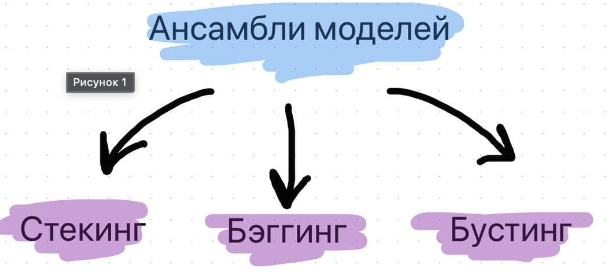

# StackingClassifier

Стекинг наименее популярний вариант ансамбля.

Основные черты стекинг: 
* Может объединить в себе алгоритмы разной природы в качестве базовых. Например, взять метод опорных векторов (SVM), k-ближайших соседей (KNN) в качестве базовых и на основе их результатов обучить логистическую регрессию для классификации. 
* Непредсказуемость работы метамодели. Если в случае бэггинга и бустинга существует достаточно четкий и конкретный ансамблевый алгоритм (увидим далее), то здесь метамодель может с течением времени по-разному обучаться на входных данных.

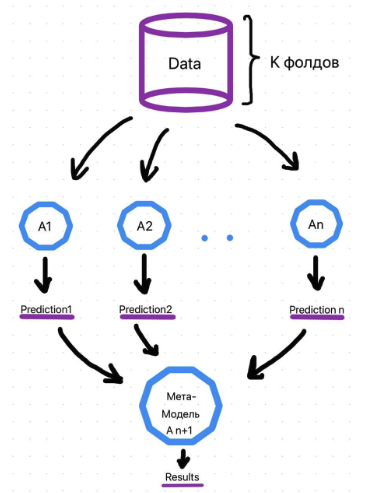

**Алгоритм обучения выглядит следующим образом**
1. Делим выборку на k фолдов (тот же смысл, что и в кросс-валидации).

2. Для объекта из выборки, который находится в k-ом фолде, делается предсказание слабыми алгоритмами, которые были обучены на k-1 фолдах. Этот процесс итеративен и происходит для каждого фолда.

3. Создается набор прогнозов слабых алгоритмов для каждого объекта выборки.

4. На сформированных низкоуровневыми алгоритмами прогнозах в итоге обучается метамодель.

In [28]:
estimators = [('lr', LogisticRegression()), ('dt', DecisionTreeClassifier())]
classifier = StackingClassifier(estimators=estimators, final_estimator=SVC())
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=SVC())

In [29]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[82  5]
 [ 5 45]]


0.927007299270073

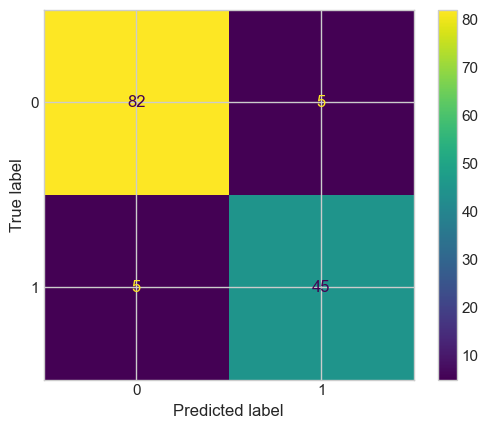

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [31]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.95 %
Standard Deviation: 2.87 %


# Bagging

Наиболее популярный  по сравнению со стекингом. Типичный представитель - Random Forest.

При данном методе базовые алгоритмы являются представителями одного и того же семейства, они обучаются параллельно и почти независимо друг от друга, а финальные результаты лишь агрегируются. Нам необходимо, чтобы на вход слабым алгоритмам подавались разные данные, а не один и тот же набор, ведь тогда результат базовых моделей будет идентичен и смысла в них не будет.

Для того, чтобы понять, каким образом исходный датасет делится для формирования входных выборок для слабых алгоритмов, используется понятие бутстрэпа. При использовании бутстрэпа из исходной выборки берется один случайный элемент, записывается в обучающую выборку, затем возвращается обратно. Так делается n раз, где n - желаемый размер обучающей выборки. Существует правило, что в обучающей выборке в итоге будет `~ 0.632*n` разных объектов. Таким образом, должны сформироваться m обучающих выборок для m слабых алгоритмов.



Бутстрэп выборки являются в значительной степени независимыми. Отчасти поэтому и говорят, что базовые алгоритмы обучаются на выборках независимо.



Что касается агрегации выходов базовых алгоритмов, то в случае задачи классификации зачастую просто выбирается наиболее часто встречающийся класс, а в случае задачи регрессии выходы алгоритмов усредняются (см рис.). В формуле под ai подразумеваются выходы базовых алгоритмов.
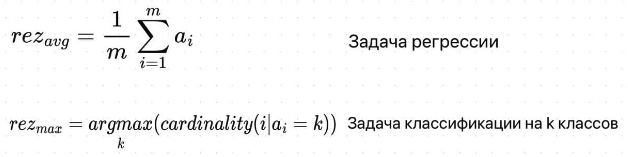

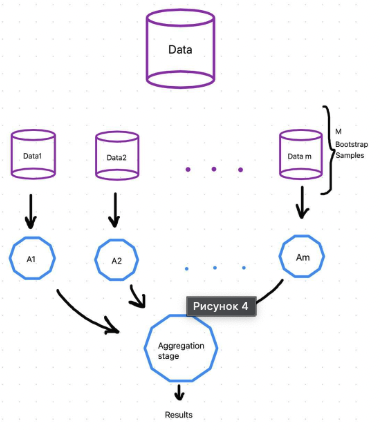

Бэггинг направлен на уменьшение разброса (дисперсии) в данных, и зачастую данный прием предстает в виде алгоритма случайного леса, где слабые модели - это довольно глубокие случайные деревья. Однако, при построении случайного леса используется еще один прием, такой как метод случайных подпространств. Мало того, что благодаря бутсрэпу выбираются некоторые объекты нашего датасета, так еще и выбирается случайное подмножество признаков. В итоге, наша условная матрица признаков уменьшается как по строкам, так и столбцам (см. рис. ниже). Это помогает действительно снизить корреляцию между слабыми учениками.

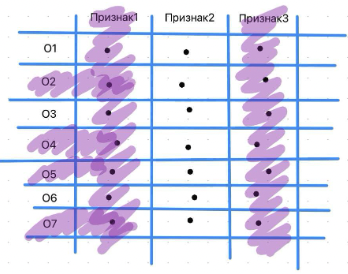

# RandomForest

In [14]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 1 49]]


0.9708029197080292

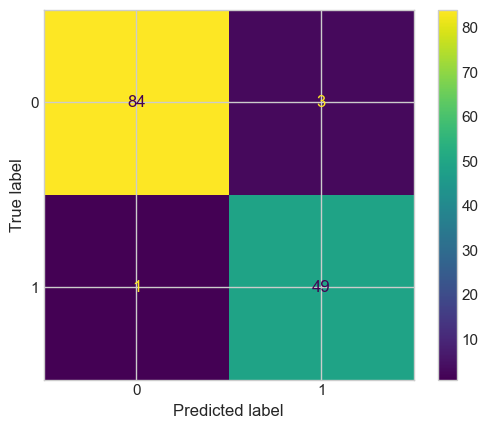

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [17]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.07 %
Standard Deviation: 2.34 %


In [18]:
accuracies

array([0.92727273, 0.96363636, 0.98181818, 1.        , 0.96363636,
       1.        , 0.94444444, 0.96296296, 1.        , 0.96296296])

# BaggingClassifier

In [21]:
classifier = BaggingClassifier(estimator=LogisticRegression())
classifier.fit(X_train, y_train)

BaggingClassifier(estimator=LogisticRegression())

In [22]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[83  4]
 [37 13]]


0.7007299270072993

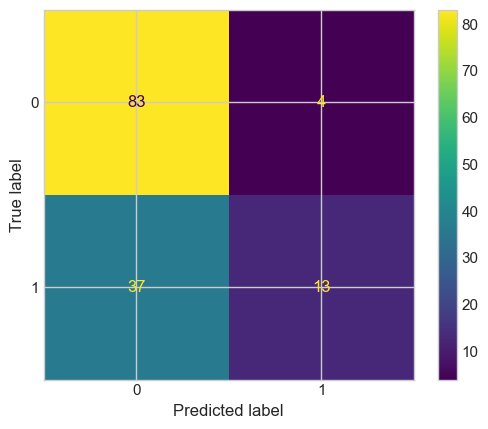

In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [24]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.17 %
Standard Deviation: 9.47 %


In [25]:
accuracies

array([0.72727273, 0.69090909, 0.70909091, 0.67272727, 0.94545455,
       0.74545455, 0.90740741, 0.83333333, 0.90740741, 0.77777778])

# Бустинг

В данном случае, модели уже не обучаются отдельно друг от друга, а каждая следующая правит ошибки предыдущей. То есть можно сказать, что если один слабый алгоритм не смог выявить какую-либо закономерность в данных, так как это было для него сложно, то следующая модель должна сделать это. Но из данного подхода вытекает недостаток: работу алгоритма трудно распараллелить из-за зависимости предыдущего и последующего шагов.

Бустинг направлен скорее на уменьшение смещения в данных, чем на снижение разброса в них. Поэтому в качестве базовых алгоритмов могут браться модели с достаточно высоким смещением, например, неглубокие случайные деревья.

Типичными представителями бустинга являются две модели: градиентный бустинг и AdaBoost. Обе по-разному решают одну и ту же оптимизационную задачу по поиску итоговой модели, представляющей собой взвешенную сумму слабых алгоритмов.

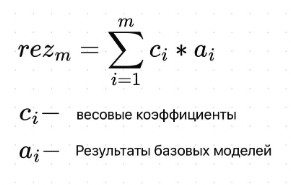


Градиентный бустинг использует типичный алгоритм градиентного спуска для решения задачи. Когда приходит время добавить новый слабый алгоритм в ансамбль делается следующее:

1. Находится оптимальный вектор сдвига, улучшающий предыдущий ансамбль алгоритмов.

2. Этот вектор сдвига является антиградиентом от функции ошибок работы предыдущего ансамбля моделей

3. Благодаря вектору сдвигов мы знаем, какие значения должны принимать объекты обучающей выборки

4. А поскольку нам надо найти очередной алгоритм в композиции, то находим тот, при использовании которого минимизируется отклонение ответов от истинных

Градиентный бустинг - это в своем роде обобщение AdaBoost, поэтому, возможно, зачастую его и изучают первым.

# AdaBoostClassifier

Данный алгоритм сначала обучает первую базовую модель(допустим деревья решений) на тренировочном наборе. Относительный вес некорректно предсказанных значений увеличивается. На вход второй базовой модели подаются обновлённые веса и модель обучается, после чего вырабатываются прогнозы и цикл повторяется.

Результат работы AdaBoost - это средневзвешенная сумма каждой модели. Спрогнозированным значением ансамбля будет тот, который получает большинство взвешенных голосов

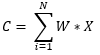

C - результат работы ансамбля, W - вес, 
X - значение прогнозатора

Adaboost обновляет веса объектов на каждой итерации. Веса хорошо классифицированных объектов уменьшаются относительно весов неправильно классифицированных объектов. Модели, которые работают лучше, имеют больший вес в окончательной модели ансамбля.

При адаптивном бустинге используется итеративный метод (добавляем слабых учеников одного за другим, просматривая каждую итерацию, чтобы найти наилучшую возможную пару (коэффициент, слабый ученик) для добавления к текущей модели ансамбля) изменения весов. Он работает быстрее, чем аналитический метод.

In [ ]:
classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=12)
classifier.fit(X_train, y_train)

In [33]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[82  5]
 [ 5 45]]


0.927007299270073

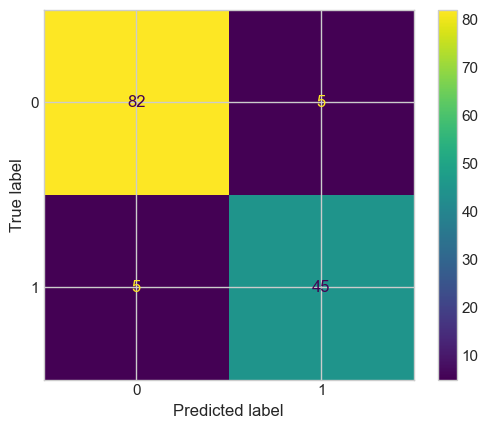

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [35]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.78 %
Standard Deviation: 2.48 %


In [36]:
accuracies

array([0.92727273, 0.90909091, 0.92727273, 0.96363636, 0.94545455,
       0.92727273, 0.92592593, 0.92592593, 1.        , 0.92592593])

# GradientBoostingClassifier

Градиентный бустинг обучает слабые модели последовательно, исправляя ошибки предыдущих. Результатом градиентного бустинга также является средневзвешенная сумма результатов моделей. Принципиальное отличие от Adaboost это способ изменения весов. Адаптивный бустинг использует итеративный метод оптимизации. Градиентный бустинг оптимизируется с помощью градиентного спуска.

Таким образом градиентный бустинг - обобщение адаптивного бустинга для дифференцируемых функций.

In [37]:
classifier = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=2, n_estimators=150,
                           random_state=12)

In [38]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[82  5]
 [ 3 47]]


0.9416058394160584

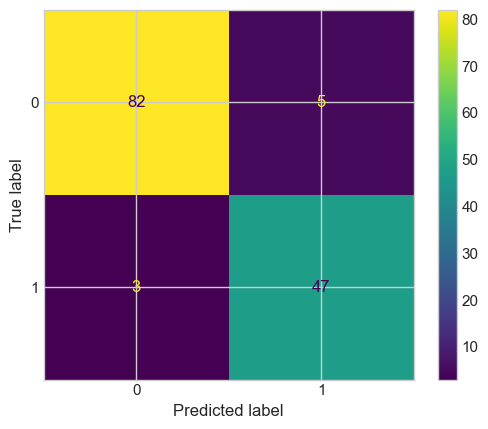

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [40]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.78 %
Standard Deviation: 2.47 %


In [41]:
accuracies

array([0.92727273, 0.96363636, 0.96363636, 0.94545455, 0.96363636,
       1.        , 0.90740741, 0.96296296, 0.98148148, 0.96296296])

# XGBoost, LightGBM и CatBoost

[XGBoost, LightGBM или CatBoost - какой алгоритм бустинга следует использовать?](https://vk.com/@coeusds-xgboost-lightgbm-ili-catboost-kakoi-algoritm-bustinga-sled)

Существует несколько различных вариаций GBDT – это XGBoost, LightGBM и CatBoost. 

Они отличаются друг от друга по нескольким критериям – симметричность деревьев, метод разбиения объектов, обработка категориальных признаков, интерпретация пропущенных значений, обработка текстовых признаков. 

* В CatBoost деревья симметричные на каждом уровне, в двух других алгоритмах – ассиметричные. Таким образом, в LightGBM алгоритме деревья растут по листьям, горизонтально (leaf-wise growth), а в XGBoost деревья растут по уровням, вертикально (level-wise growth). 

* В CatBoost используется жадный алгоритм разбиения наблюдений, в LightGBM используется Gradient-based One-Side Sampling, основанный на значениях градиента для наблюдений, а в XGBoost разбиение работает по предварительной сортировке значений признаков. 

* На вход CatBoost могут подаваться категориальные признаки, LightGBM может принимать их на вход только в числовом формате, однако можно в порядковом виде. А XGBoost не может работать с порядковыми данными, категориальные признаки должны подаваться только после кодирования.

# XGBoost

* `pip install xgboost`
* `conda install -c conda-forge xgboost`

In [44]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85  2]
 [ 1 49]]


0.9781021897810219

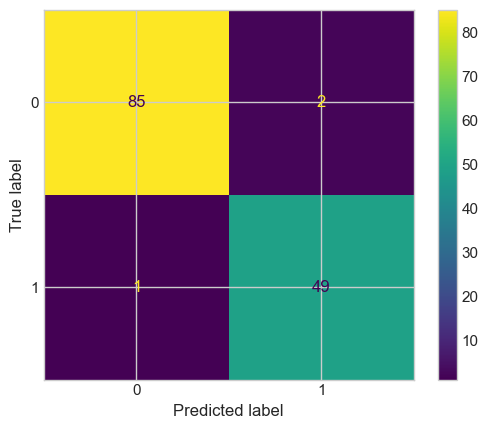

In [46]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [47]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.53 %
Standard Deviation: 2.63 %


In [48]:
accuracies

array([0.90909091, 0.96363636, 0.96363636, 0.98181818, 0.94545455,
       1.        , 0.94444444, 0.96296296, 1.        , 0.98148148])

# CatBoost

* `pip install catboost`
* `conda install -c conda-forge catboost`

In [54]:
gc.collect()

5249

In [55]:
classifier = CatBoostClassifier(verbose=0)
classifier.fit(X_train, y_train)

In [56]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[84  3]
 [ 0 50]]


0.9781021897810219

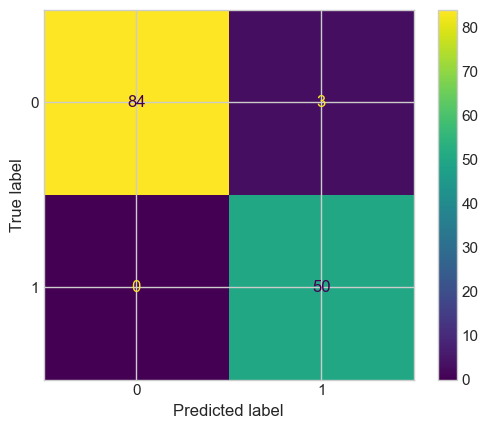

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [58]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 97.26 %
Standard Deviation: 2.03 %


# LightGBM

* `pip install lightgbm`
* `conda install -c conda-forge lightgbm`

In [59]:
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)

LGBMClassifier()

In [60]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[85  2]
 [ 0 50]]


0.9854014598540146

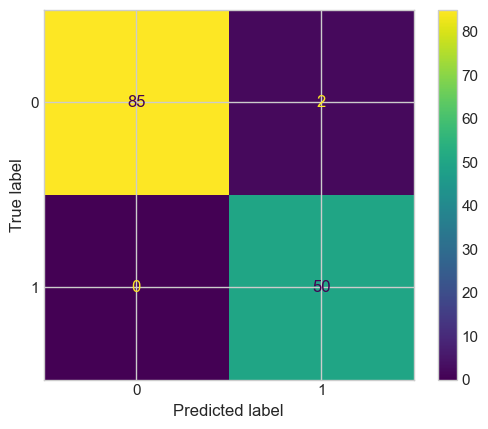

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)
disp.plot()
plt.show()

In [62]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.71 %
Standard Deviation: 2.55 %


In [63]:
accuracies

array([0.92727273, 0.94545455, 0.96363636, 1.        , 0.94545455,
       1.        , 0.98148148, 0.96296296, 1.        , 0.94444444])

# ДЗ:

1. Использовать датасет `telecom_churn.csv`
2. Обучить LogisticRegression. Использовать в качестве `baseline`.
3. Обучить на этом датасете все три вида ансамблей, использованных в этом ноутбуке. Сравнить с baseline
4. Использовать PCA для понижения размерности, или использовать статистическим методом отбор признаков SelectKBest. Затем обучить LogisticRegression в качестве `baseline`, и обучить все три вида ансамблей, рассмотренных в этом ноутбуке. 
5. Сравнить результаты между собой до понижения размерности или отбора признаков, так и после них.
